# Дипломная работа
## по профессии "Аналитик данных"
### по теме "Анализ данных по COVID-19. Исследование фактора вакцинации. Построение модели"

![](https://clinica-opora.ru/wp-content/uploads/2020/11/d0bed182d0bad183d0b4d0b0-d0bfd0bed18fd0b2d0b8d0bbd181d18f-d0bad0bed180d0bed0bdd0b0d0b2d0b8d180d183d181_5fa75dad00d68.jpeg)

#### Для исследования будем использовать [этот](https://www.kaggle.com/hussainaliarif/largest-covid19-world-dataset "перейти на Kaggle") датасет 
Этот набор данных содержит последние данные о состоянии Covid-19 в мире в деталях с 2/24/2020 по 6/29/2021

In [1]:
# испортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [2]:
# загружаем данные в датафрейм из csv файла
df = pd.read_csv('Covid-19-World-Dataset.csv')

## Первичный анализ данных

In [3]:
# В нашем датасете 44 столбца, столько Пандас сразу не отобразит.
# Установим максимальное отображение столбцов равное 50 с помощью set_option, чтобы все колонки нашего датасета выводились
pd.set_option('display.max_columns', 50)

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


Нам не нужны все данные из этого датафрейма, оставим для исследования несколько стран из ТОП по заражениям, плюс Россия (наша страна), плюс Израиль (если не ошибаюсь они были в первых рядах по темпам вакцинации)

In [5]:
df_top = df[['location', 'new_cases']].groupby('location').sum().sort_values(by='new_cases', ascending=False).head(20).reset_index()
df_top

,location,new_cases
0,World,181335334.0
1,Asia,54849691.0
2,Europe,48540929.0
3,North America,39650639.0
4,United States,33652097.0
5,European Union,33066019.0
6,South America,32772980.0
7,India,30362848.0
8,Brazil,18513305.0
9,France,6184552.0


Виуалзируем ТОП стран (регионов) по заражениям, регион World исключим

<AxesSubplot:xlabel='location', ylabel='new_cases (10*млн)'>

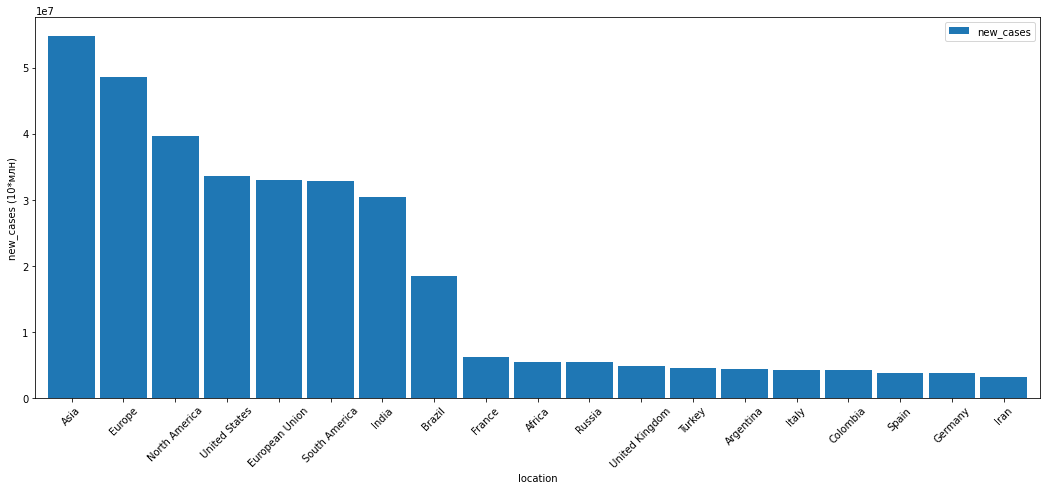

In [6]:
df_top.loc[1:].plot(kind='bar', 
                    x='location', 
                    y='new_cases', 
                    figsize=(18, 7),
                    ylabel='new_cases (10*млн)',
                    rot='45',
                    width=0.9)

In [7]:
#Оставим страны для анализа:
countries = ['United States', 'Brazil', 'Russia', 'United Kingdom', 'Israel']
df1 = df[df['location'].isin(countries)]
df1.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12905,BRA,South America,Brazil,12/14/2020,6927145.0,25193.0,181835.0,433.0,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.35,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
93468,GBR,Europe,United Kingdom,2/27/2020,44.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
93868,GBR,Europe,United Kingdom,4/2/2021,4367969.0,3422.0,127058.0,52.0,0.73,485.0,3375.0,NaN,NaN,555613.0,125844450.0,1853.761,8.185,0.004,240.9,tests performed,36631187.0,31425682.0,5205505.0,354051.0,53.96,46.29,7.67,70.37,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
12983,BRA,South America,Brazil,3/2/2021,10646926.0,59925.0,257361.0,1641.0,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8841027.0,6806293.0,2034734.0,375624.0,4.16,3.20,0.96,67.13,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
74040,RUS,Europe,Russia,4/27/2021,4725252.0,7931.0,107167.0,384.0,1.00,NaN,NaN,NaN,NaN,251749.0,128530745.0,880.743,1.725,0.030,33.5,tests performed,18557064.0,11599037.0,6958027.0,241748.0,12.72,7.95,4.77,36.57,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
73883,RUS,Europe,Russia,11/21/2020,2047563.0,24538.0,35442.0,462.0,1.09,NaN,NaN,NaN,NaN,590770.0,72429063.0,496.312,4.048,0.041,24.1,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
73988,RUS,Europe,Russia,3/6/2021,4263785.0,10909.0,87253.0,432.0,0.91,NaN,NaN,NaN,NaN,354205.0,113280229.0,776.240,2.427,0.034,29.3,tests performed,6583873.0,5082127.0,1501746.0,282019.0,4.51,3.48,1.03,40.28,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
93778,GBR,Europe,United Kingdom,1/2/2021,2607546.0,57853.0,74682.0,445.0,1.32,2256.0,27561.0,NaN,NaN,411523.0,53396177.0,786.556,6.062,0.119,8.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.63,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
73607,RUS,Europe,Russia,2/19/2020,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
94302,USA,North America,United States,1/1/2021,20254160.0,153916.0,354366.0,2155.0,1.07,27470.0,121028.0,NaN,NaN,1243010.0,258638928.0,781.380,3.755,0.138,7.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


Все столбцы нам также не нужны, оставим для исследования:
- location - Страна
- date - дата
- total_cases - всего заражений на текущую дату
- new_cases - новых заражений за эту дату
- total_deaths - всего смертей на текущую дату
- new_deaths - новые смерти за эту дату
- total_vaccinations - всего вакцинаций
- people_vaccinated - всего прививок первой дозой вакцины
- people_fully_vaccinated - всего вакцинированных обеими дозами
- new_vaccinations - новых вакцинаций за эту дату
- population - Население страны

In [8]:
cols = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 
            'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'population']

In [9]:
df2 = df1[cols]
df2.sample(10)

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
44226,Israel,4/24/2020,15143.0,248.0,199.0,3.0,NaN,NaN,NaN,NaN,8655541.0
93784,United Kingdom,1/8/2021,2966248.0,68192.0,79965.0,1333.0,NaN,NaN,NaN,NaN,67886004.0
44199,Israel,3/28/2020,3901.0,480.0,13.0,1.0,NaN,NaN,NaN,NaN,8655541.0
93809,United Kingdom,2/2/2021,3863761.0,16906.0,108225.0,1451.0,10520433.0,10021471.0,498962.0,376922.0,67886004.0
93992,United States,2/26/2020,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0
93782,United Kingdom,1/6/2021,2845269.0,62556.0,77470.0,1042.0,NaN,NaN,NaN,NaN,67886004.0
93547,United Kingdom,5/16/2020,229406.0,2072.0,33833.0,411.0,NaN,NaN,NaN,NaN,67886004.0
73652,Russia,4/4/2020,4731.0,582.0,43.0,9.0,NaN,NaN,NaN,NaN,145934460.0
44419,Israel,11/3/2020,316641.0,846.0,2622.0,26.0,NaN,NaN,NaN,NaN,8655541.0
44392,Israel,10/7/2020,282340.0,4165.0,1846.0,26.0,NaN,NaN,NaN,NaN,8655541.0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 12613 to 94481
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 2543 non-null   object 
 1   date                     2543 non-null   object 
 2   total_cases              2542 non-null   float64
 3   new_cases                2541 non-null   float64
 4   total_deaths             2373 non-null   float64
 5   new_deaths               2373 non-null   float64
 6   total_vaccinations       800 non-null    float64
 7   people_vaccinated        798 non-null    float64
 8   people_fully_vaccinated  739 non-null    float64
 9   new_vaccinations         765 non-null    float64
 10  population               2543 non-null   float64
dtypes: float64(9), object(2)
memory usage: 238.4+ KB


## Предоработка данных

In [11]:
# преобразуем столбец date из типа object в тип datetime
df2['date'] = pd.to_datetime(df2['date'])

<ipython-input-11-dabe1bbf71db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'])


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 12613 to 94481
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 2543 non-null   object        
 1   date                     2543 non-null   datetime64[ns]
 2   total_cases              2542 non-null   float64       
 3   new_cases                2541 non-null   float64       
 4   total_deaths             2373 non-null   float64       
 5   new_deaths               2373 non-null   float64       
 6   total_vaccinations       800 non-null    float64       
 7   people_vaccinated        798 non-null    float64       
 8   people_fully_vaccinated  739 non-null    float64       
 9   new_vaccinations         765 non-null    float64       
 10  population               2543 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 238.4+ KB


In [13]:
# переиндексируем наш датафрейм
df2 = df2.reset_index()
del df2['index'] # удаляем столбец со старыми индексами
df2.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
0,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0
1,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0
2,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0
3,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0
4,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0


## Работа с пропусками
У нас только 3 столбца, где заполнены все значения, это location, date и population. С остальными придется поработать.
Начем с total_cases и new_cases, в них всего 1 и 2 пропуска соответственно.

In [14]:
# выведем строку с пустым total_cases
df2.loc[df2['total_cases'].isna()]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
490,Israel,2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8655541.0


In [15]:
# посмотрим что ДО и ПОСЛЕ этой строки
df2.loc[488:492]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
488,Brazil,2021-06-28,18448402.0,27804.0,514092.0,618.0,96913929.0,71291563.0,25622366.0,109265.0,212559409.0
489,Brazil,2021-06-29,18513305.0,64903.0,515985.0,1893.0,98827485.0,72722360.0,26105125.0,1913556.0,212559409.0
490,Israel,2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8655541.0
491,Israel,2020-02-21,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8655541.0
492,Israel,2020-02-22,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8655541.0


видимо для Израиля не было данных за первый день сбора информации, логично заполнить его нулем.

In [16]:
df2['total_cases'].fillna(0, inplace=True)
df2.loc[488:492]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
488,Brazil,2021-06-28,18448402.0,27804.0,514092.0,618.0,96913929.0,71291563.0,25622366.0,109265.0,212559409.0
489,Brazil,2021-06-29,18513305.0,64903.0,515985.0,1893.0,98827485.0,72722360.0,26105125.0,1913556.0,212559409.0
490,Israel,2020-02-20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8655541.0
491,Israel,2020-02-21,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8655541.0
492,Israel,2020-02-22,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8655541.0


In [17]:
# выведем строки с пустыми new_cases
df2.loc[df2['new_cases'].isna()]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
490,Israel,2020-02-20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8655541.0
2018,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0


In [18]:
# Для Израиля и США заполним пустоты нулем, т.к. это саоме начало сбора данных
df2.loc[490, 'new_cases'] = 0
df2.loc[2018, 'new_cases'] = 0

А что с остальными столбцами.  
Почти все пропуски идут в начале сбора данных и это логично, для смертей - их сначала не было, для вакцинации тоже, вакцинировать стали примерно с начала этого года, а данные с феврали прошлого, пока вакцин не было лочино что в этих полях будет 0. Но просто заполнить все пропуски нулями мы не можем, т.к. пропуски есть и в более поздних периодах - это можно видеть, например, из графиков вакцинации:

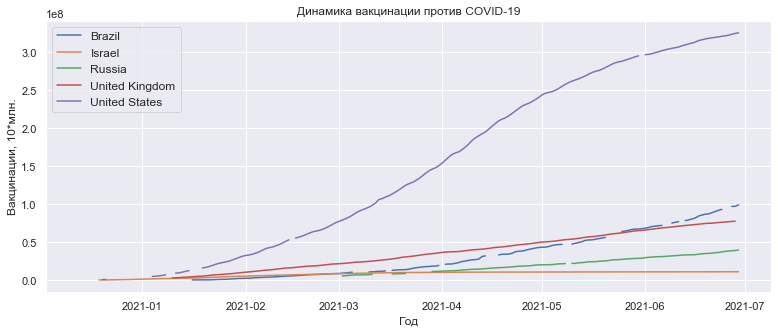

In [54]:
# построим сводный график вакцинаций (total_vaccinations) по странам
rcParams['figure.figsize'] = 13,5
plt.title('Динамика вакцинации против COVID-19')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Вакцинации, 10*млн.', fontsize=12)
for country in df2['location'].unique():
    plt.plot(df2[df2['location'] == country]['date'], df2[df2['location'] == country]['total_vaccinations'])
plt.legend(df2['location'].unique(), fontsize=12)

Логично для заполнения пропусков применить интерполяцию данных, т.к. действительно, если "вчера" было вакцинация, к примеру, 20 000, "завтра" 25 000, а за "сегодня" нет данных, врядли за сегодня данные будут сильно отличаться от соседних дней.  
Но применить интерполицию сразу ко всему датафрейму мы не можем, т.к. у нас идет разделение по странам за одни и теже даты. Поэтому разделим датафрейм на несколько (по количеству стран, применим интерполяцию и потом можно склеить обратно).  
Также надо будет для каждой страны заполнить начальные данные нулями, чтобы было отчего отталкиваться при интерполировании.

In [20]:
countries

['United States', 'Brazil', 'Russia', 'United Kingdom', 'Israel']

In [21]:
df_US = df2[df2['location'] == 'United States']
df_BRA = df2[df2['location'] == 'Brazil']
df_RUS = df2[df2['location'] == 'Russia']
df_UK = df2[df2['location'] == 'United Kingdom']
df_ISR = df2[df2['location'] == 'Israel']

In [22]:
# заполним в первых нескольких строках пропуски нулями для старта интерполяции
df_US.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
2018,United States,2020-01-22,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0
2019,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0
2020,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0
2021,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0
2022,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0


In [23]:
df_US.fillna(0, limit=3, inplace=True)
df_US.head(5)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
2018,United States,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331002647.0
2019,United States,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331002647.0
2020,United States,2020-01-24,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,331002647.0
2021,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0
2022,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0


In [24]:
# заполним также для остальных стран
df_BRA.fillna(0, limit=3, inplace=True)
df_RUS.fillna(0, limit=3, inplace=True)
df_UK.fillna(0, limit=3, inplace=True)
df_ISR.fillna(0, limit=3, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [25]:
# Произведем интерполяцию
df_US.interpolate(method ='linear', limit_direction ='forward', inplace=True)
df_BRA.interpolate(method ='linear', limit_direction ='forward', inplace=True)
df_RUS.interpolate(method ='linear', limit_direction ='forward', inplace=True)
df_UK.interpolate(method ='linear', limit_direction ='forward', inplace=True)
df_ISR.interpolate(method ='linear', limit_direction ='forward', inplace=True)

<ipython-input-25-fb5607ee0485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US.interpolate(method ='linear', limit_direction ='forward', inplace=True)
<ipython-input-25-fb5607ee0485>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BRA.interpolate(method ='linear', limit_direction ='forward', inplace=True)
<ipython-input-25-fb5607ee0485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RUS.interpolate(method ='linear', li

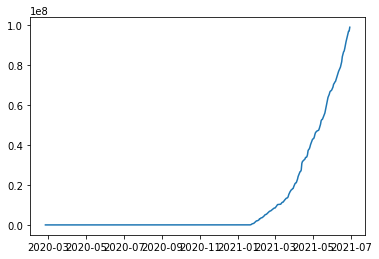

In [26]:
# посмотрим теперь на график вакцинации, к примеру, Бразилии
plt.plot(df_BRA['date'], df_BRA['total_vaccinations'])

Заполнение пропусков с помощью интерполяции прошло успешно, график "похож на правду". Осталось склеить обратно датафреймы.

In [27]:
df_clean = pd.concat([df_US, df_BRA, df_RUS, df_UK, df_ISR])

In [28]:
df_clean.sample(5)

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population
71,Brazil,2020-05-07,135773.0,9162.0,9190.000000,602.000000,0.000000e+00,0.000000e+00,3.935407e+02,23.851852,212559409.0
1970,United Kingdom,2021-05-13,4460405.0,2663.0,127912.000000,11.000000,5.543496e+07,3.611596e+07,1.931901e+07,637325.000000,67886004.0
804,Israel,2020-12-30,416584.0,4186.0,3307.000000,15.000000,8.319470e+05,8.319470e+05,9.842271e-01,152723.000000,8655541.0
2022,United States,2020-01-26,5.0,3.0,0.055556,0.055556,3.360773e+03,3.360773e+03,7.539809e+03,348.849398,331002647.0
1075,Russia,2020-04-29,99399.0,5841.0,972.000000,105.000000,7.821767e+03,7.821767e+03,2.410158e+05,52753.055696,145934460.0


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 2018 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 2543 non-null   object        
 1   date                     2543 non-null   datetime64[ns]
 2   total_cases              2543 non-null   float64       
 3   new_cases                2543 non-null   float64       
 4   total_deaths             2543 non-null   float64       
 5   new_deaths               2543 non-null   float64       
 6   total_vaccinations       2543 non-null   float64       
 7   people_vaccinated        2543 non-null   float64       
 8   people_fully_vaccinated  2543 non-null   float64       
 9   new_vaccinations         2543 non-null   float64       
 10  population               2543 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 238.4+ KB


Итак, мы привели данные в порядок, убрали пропуски, привели дату к типу datetime, можно приступать к исследованию.

## Исследование и визуализация данных

In [30]:
from pylab import rcParams

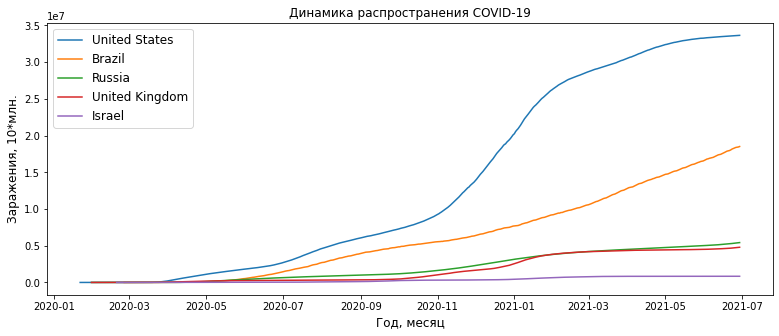

In [31]:
# построим сводный график заболеваний (total_cases) по странам
rcParams['figure.figsize'] = 13,5
plt.title('Динамика распространения COVID-19')
plt.xlabel('Год, месяц', fontsize=12)
plt.ylabel('Заражения, 10*млн.', fontsize=12)
for country in df_clean['location'].unique():
    plt.plot(df_clean[df_clean['location'] == country]['date'], df_clean[df_clean['location'] == country]['total_cases'])
plt.legend(df_clean['location'].unique(), fontsize=12)

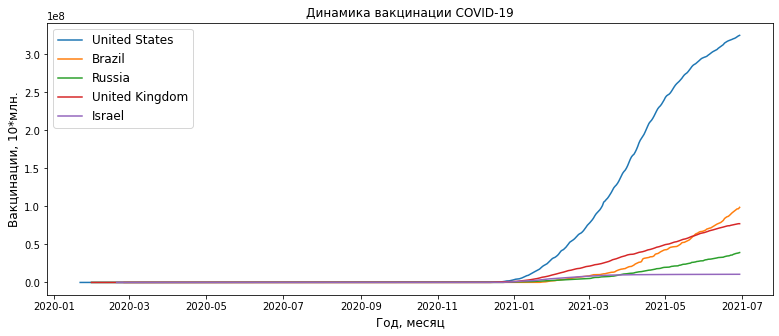

In [32]:
# построим сводный график вакцинаций (total_vaccinations) по странам
rcParams['figure.figsize'] = 13,5
plt.title('Динамика вакцинации COVID-19')
plt.xlabel('Год, месяц', fontsize=12)
plt.ylabel('Вакцинации, 10*млн.', fontsize=12)
for country in df_clean['location'].unique():
    plt.plot(df_clean[df_clean['location'] == country]['date'], df_clean[df_clean['location'] == country]['total_vaccinations'])
plt.legend(df_clean['location'].unique(), fontsize=12)

По данному графику на первый взгляд можно сделать вывод (ошибочный ???) что США "впереди планеты всей", это так, но если считать в абсолютном числе вакцинаций, но для отдельных стран и для сравнения темпов вакцинации с другими странами будет правильнее считать кол-во вакцинаций как процент от населения.

In [33]:
df_clean['percent_vaccinated'] = round(df_clean['people_fully_vaccinated'] / df_clean['population'] * 100, 2)

In [34]:
df_clean.sample(10)

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,percent_vaccinated
463,Brazil,2021-06-03,16803472.0,83391.0,469388.0,1682.0,7.033030e+07,4.763642e+07,2.269388e+07,1.410440e+06,212559409.0,10.68
2328,United States,2020-11-27,13214388.0,207933.0,267254.0,1551.0,5.175591e+05,5.175591e+05,1.161131e+06,5.372281e+04,331002647.0,0.35
72,Brazil,2020-05-08,146894.0,11121.0,10017.0,827.0,0.000000e+00,0.000000e+00,3.992442e+02,2.419753e+01,212559409.0,0.00
106,Brazil,2020-06-11,802828.0,30412.0,40919.0,1239.0,0.000000e+00,0.000000e+00,5.931628e+02,3.595062e+01,212559409.0,0.00
1056,Russia,2020-04-10,11917.0,1786.0,94.0,18.0,6.113565e+03,6.113565e+03,1.883802e+05,4.123227e+04,145934460.0,0.13
2393,United States,2021-01-31,26249342.0,112152.0,449425.0,1858.0,3.112330e+07,2.520114e+07,5.657142e+06,1.545397e+06,331002647.0,1.71
1067,Russia,2020-04-21,52763.0,5642.0,456.0,51.0,7.102524e+03,7.102524e+03,2.188535e+05,4.790220e+04,145934460.0,0.15
1365,Russia,2021-02-13,4012538.0,14640.0,78403.0,492.0,3.744683e+06,3.039757e+06,1.044402e+06,2.285966e+05,145934460.0,0.72
327,Brazil,2021-01-18,8511770.0,23671.0,210299.0,452.0,1.109000e+03,1.109000e+03,1.853634e+03,9.970000e+02,212559409.0,0.00
832,Israel,2021-01-27,621590.0,11934.0,4605.0,92.0,4.431774e+06,2.879228e+06,1.552546e+06,2.024120e+05,8655541.0,17.94


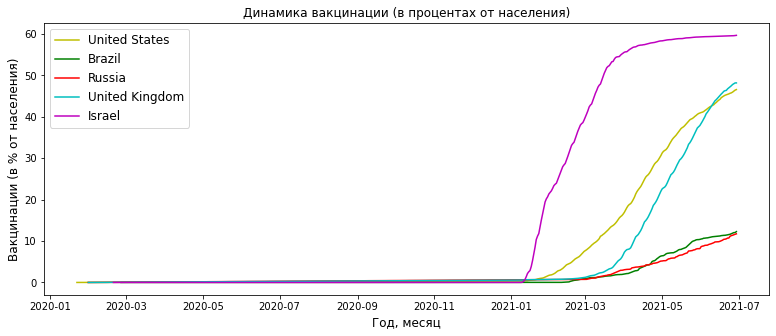

In [35]:
# построим сводный график вакцинаций (total_vaccinations) по странам в % от населения
rcParams['figure.figsize'] = 13,5
colors = ['y', 'g', 'r', 'c', 'm']
plt.title('Динамика вакцинации (в процентах от населения)')
plt.xlabel('Год, месяц', fontsize=12)
plt.ylabel('Вакцинации (в % от населения)', fontsize=12)
i = 0
for country in df_clean['location'].unique():
    plt.plot(df_clean[df_clean['location'] == country]['date'], df_clean[df_clean['location'] == country]['percent_vaccinated'],
            c=colors[i])
    i+=1
plt.legend(df_clean['location'].unique(), fontsize=12)

Тут уже картина несколько другая, Израиль, практически сразу как появилась вакцина в массовом доступе (за эту отметку можно считать в среднем январь 2021) начал с высоких темпов вакцинации и довольно быстро (к марту 2021) достиг отметки близкой к 60% от населения.  
США и Великобритания немного отстают, но тоже недалеко.  
Россия и Бразилия пока в начале пути, вакцинировано не многим больше 10% населения (данные на конец июля 2021).  
P.s. То, что у Израиля (да и у США и Британии наблюдается) темпы резко падают где-то после отметки 55-60% обясняется тем, что вакцинация проводится среди взрослого населения, а в популяции всё население, т.е. если из популяции убрать детей до 18-ти лет, и тех взрослых, которым вакцинироваться нельзя по медицинским показателям, то 60% от ВСЕГО населения - это будет близко к 90% от населения которому разрешено вакцинироваться.

Оставим данные только с начала 2021 года, т.к. с этого периода началась массовая вакцинация

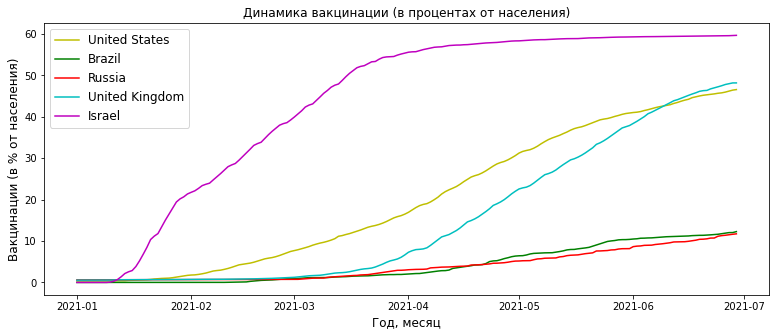

In [36]:
rcParams['figure.figsize'] = 13,5
colors = ['y', 'g', 'r', 'c', 'm']
plt.title('Динамика вакцинации (в процентах от населения)')
plt.xlabel('Год, месяц', fontsize=12)
plt.ylabel('Вакцинации (в % от населения)', fontsize=12)
i = 0
for country in df_clean['location'].unique():
    plt.plot(df_clean[(df_clean['location'] == country) & (df_clean['date'] >= '2021-01-01')]['date'], 
             df_clean[(df_clean['location'] == country) & (df_clean['date'] >= '2021-01-01')]['percent_vaccinated'],
             c=colors[i])
    i+=1
plt.legend(df_clean['location'].unique(), fontsize=12)

Посмотрим корреляцию между различными показателями для США. Берем США, т.к. у них относительно плавно идет вакцинация и довольно много вакцинированных, Россия и Бразилия думаю в этом плане пока не сильно информативны...  
Учитывая что мы исследуем влияние фактора вакцинации, смотреть будем также за 2021 год.

In [47]:
df_US_2021 = df_clean[(df_clean['date'] >= '2021-01-01') & (df_clean['location'] == 'United States')]

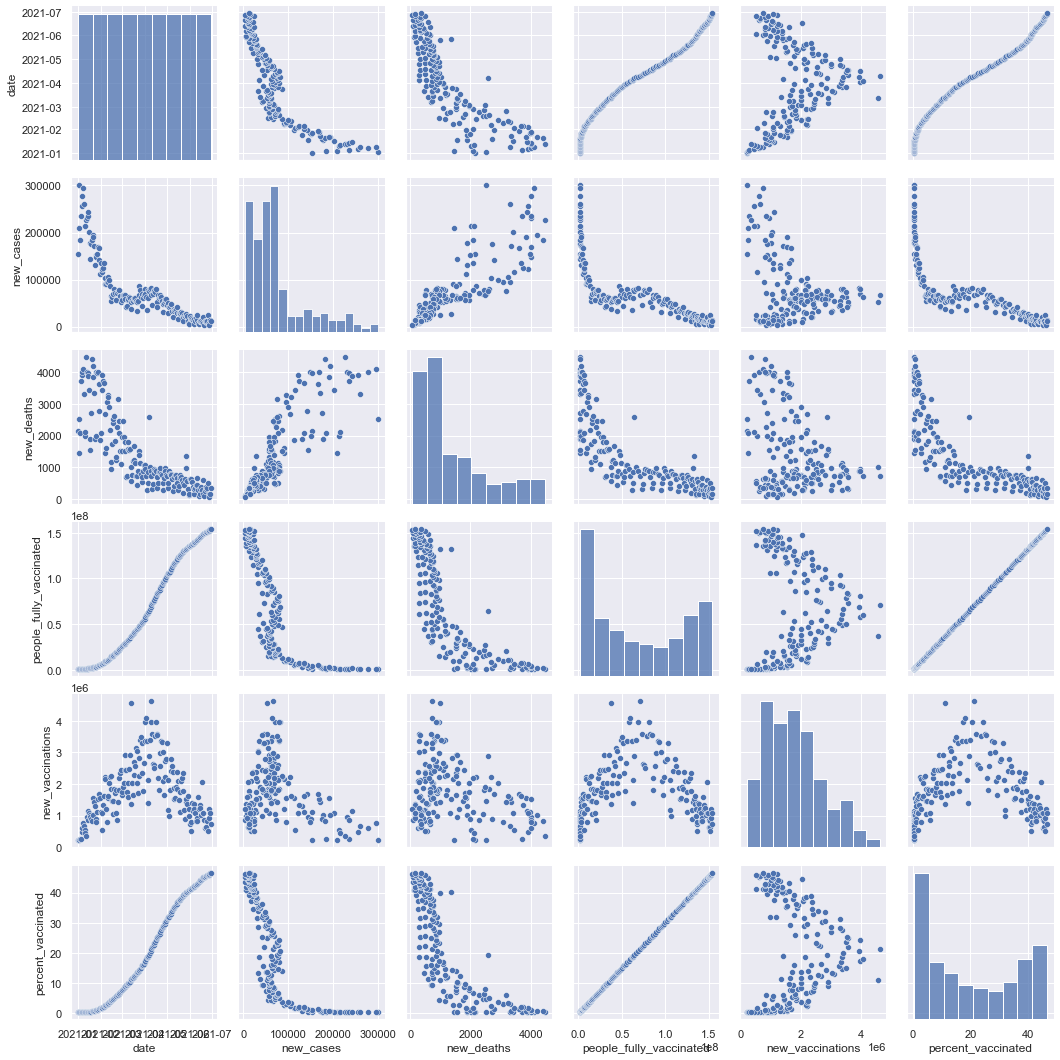

In [48]:
sns.pairplot(df_US_2021, vars=(['date', 'new_cases', 'new_deaths', 'people_fully_vaccinated',
       'new_vaccinations', 'percent_vaccinated']))

Мы можем наблюдать зависимости новых смертей от новых заражений - прямая зависимость - больше заражений - больше смертей.  
Также можем наблюдать обратную зависимость новых заражений и смертей от кол-ва полностью вакцинированных людей.

Посмотрим также на тепловую карту зависимостей

<AxesSubplot:>

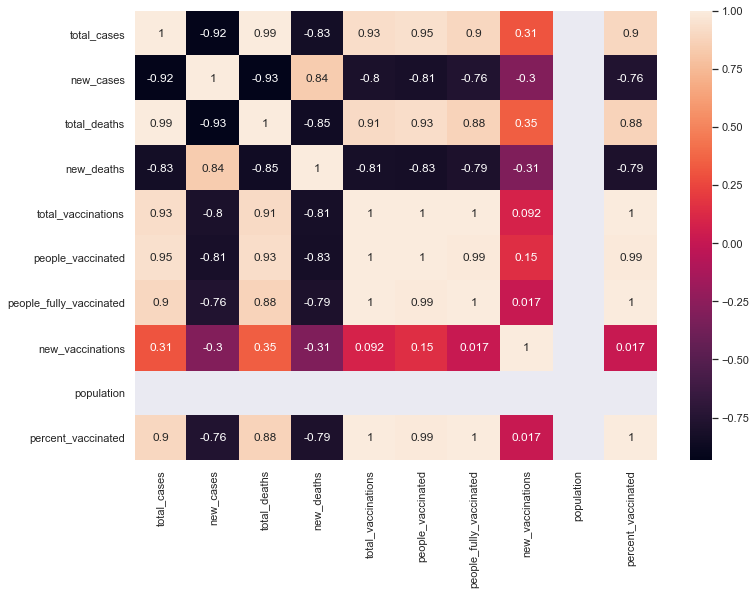

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_US_2021.corr(), annot=True)

Тут мы можем видеть сильные отрицательные зависимости заражений и смертей от фактора вакцинации, т.е. **чем больше абсолютное число и % вакцинированных - тем меньше заражений и смертей !!!**  
Отсюда можно сделать вывод что **Вакцинация помогает в борьбе с эпидемией**.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='percent_vaccinated', ylabel='new_deaths'>

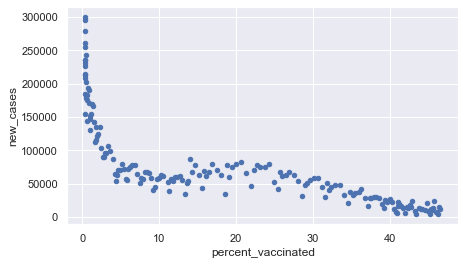

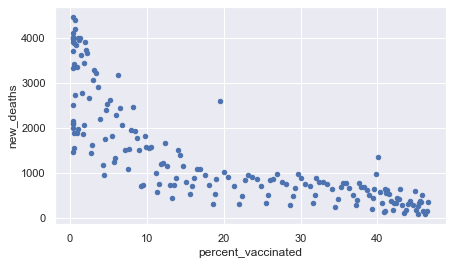

In [57]:
# Визуализируем отдельно графики зависимости заражений и смертей от % вакцинированных
df_US_2021.plot(kind='scatter',
               x='percent_vaccinated',
               y='new_cases',
               figsize=(7, 4))
df_US_2021.plot(kind='scatter',
               x='percent_vaccinated',
               y='new_deaths',
               figsize=(7, 4))

Тут таже мы наглядно видим что **чем больше вакцинаций, тем меньше число инфецирований и смертей**

## Построение модели

В качестве модели будем использовать модель линейной регресии

In [45]:
# импотрируем нужные для построения модели библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [83]:
# создаем признаки (X) и что будем предсказывать (y). Признак у нас в данном случае один - процент вакцинации населения,
# а предсказывать будем смертность
X = df_US_2021[['percent_vaccinated', 'new_cases']]
y = df_US_2021['new_deaths']

In [84]:
# разделяем данные на учебную и тестову выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
# Обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [86]:
model.coef_

array([-2.84848405e+01,  9.79243090e-03])

Оценим качество модели с помощью метрики RSME (корень из SME). Квадратный корень введен, чтобы масштаб ошибок был таким же, как масштаб целей.

In [87]:
from sklearn.metrics import mean_squared_error
import math

In [88]:
y_pred = model.predict(X_test)
y_pred

array([3017.66349803, 2113.64988487,  252.59332963, 1414.97100921,
        341.84009009, 3203.4763648 , 2698.1248178 , 1525.40143703,
        964.4603404 ,  954.34830914, 1057.25164794,  211.03806597,
       1561.95099709,  248.7324299 , 1648.08287177, 2968.31832537,
       1638.90138467,  769.87049961, 1421.93092692, 1804.49124183,
       1454.26762883,  795.94492953,  370.38776151, 2291.139598  ,
       3320.0656696 ,   54.10115711, 1575.70594426, 2949.81521594,
        202.35755442,   65.90214969, 1096.41674023, 1815.12421759,
        415.75239461,  758.67550661, 1410.56375019, 2591.33698224,
        937.93955276, 1379.75800753, 1530.00512451, 2512.35346126,
       3485.42065783, 2181.01586573,  755.60541769, 1072.08673253,
        260.61701202])

In [89]:
# сравним визуально реальные данные с прогнозами
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df.head(10)

,percent_vaccinated,new_cases,y_pred,y_test
2382,0.65,183261.0,3017.663498,4406.0
2405,3.65,99670.0,2113.649885,2910.0
2516,41.28,19080.0,252.593330,616.0
2441,13.00,55519.0,1414.971009,737.0
2508,39.83,23976.0,341.840090,979.0
2378,0.52,201858.0,3203.476365,3423.0
2387,1.01,151677.0,2698.124818,1976.0
2431,9.94,57895.0,1525.401437,1572.0
2476,28.12,53495.0,964.460340,748.0
2481,30.11,58251.0,954.348309,873.0


In [90]:
MSE = mean_squared_error(y_test, y_pred)

RMSE = math.sqrt(MSE)
RMSE

566.267867115721